In [1]:
from schmeud import qlm
import gsd.hoomd

import matplotlib.pyplot as plt

import numpy as np

In [14]:
pair = qlm.BidispHertz()
qlm_comp = qlm.QLM(pair)

# snap = gsd.hoomd.open("/")

snap = gsd.hoomd.Snapshot()
pos = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [2, 0, 0],
    [2, 1, 0],
    [2, 2, 0],
    [0, 2, 0],
    [1, 2, 0]
], dtype=float)
pos[:, :2] -= 1
snap.particles.position = pos
snap.particles.N = len(snap.particles.position)
snap.configuration.dimensions = 2
snap.configuration.box = [3,3,0,0,0,0]
snap.particles.types = ["A"]
snap.particles.typeid = np.zeros(len(snap.particles.position), dtype=int)

In [15]:
eig_vals, eig_vecs, hessian = qlm_comp.compute(snap, k=10, filter=False, sigma=None)

In [16]:
hessian.shape

(18, 18)

In [17]:
print(hessian[:4, :4])

[[-0.24983877  0.          0.12491937  0.        ]
 [ 0.         -0.24983877  0.          0.        ]
 [ 0.12491937  0.         -0.24983874  0.        ]
 [ 0.          0.          0.         -0.24983877]]


In [5]:
class Packing:
    """Compute"""

    def __init__(self, snapshot: gsd.hoomd.Snapshot):
        self._snapshot = snapshot

In [8]:
import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches

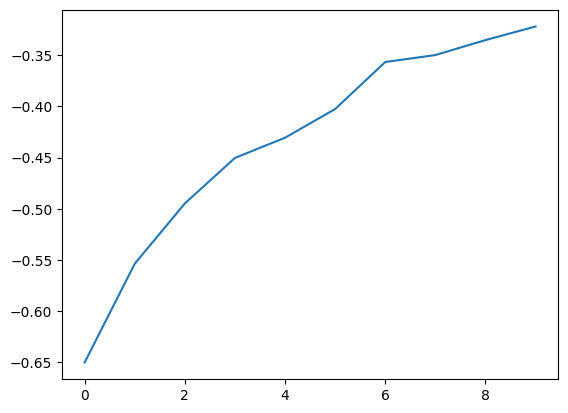

In [6]:
plt.plot(eig_vals)

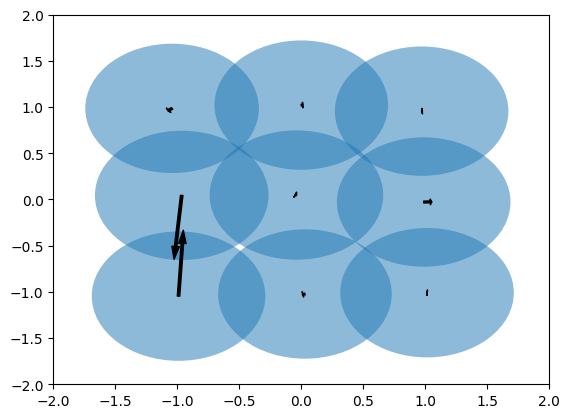

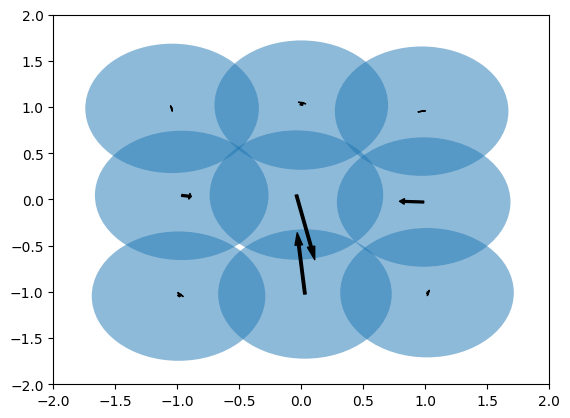

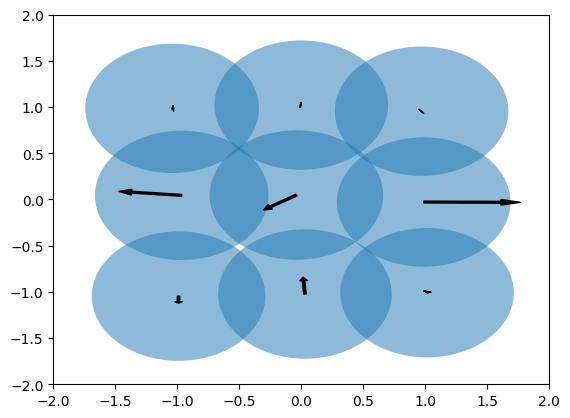

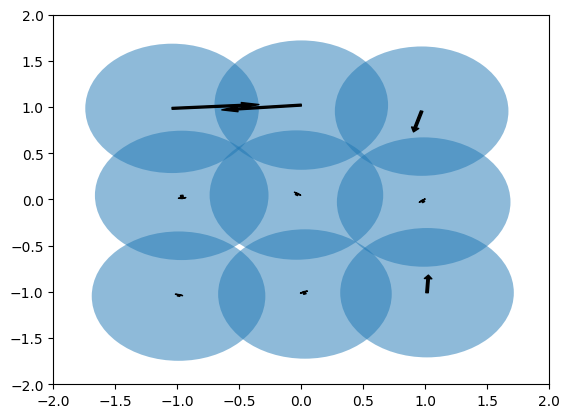

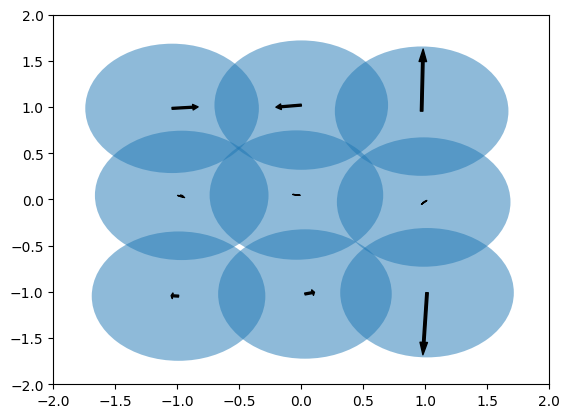

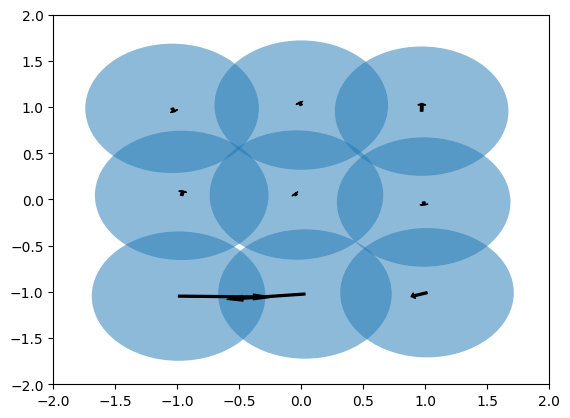

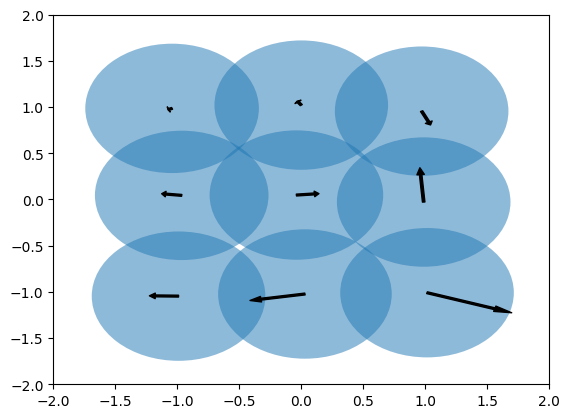

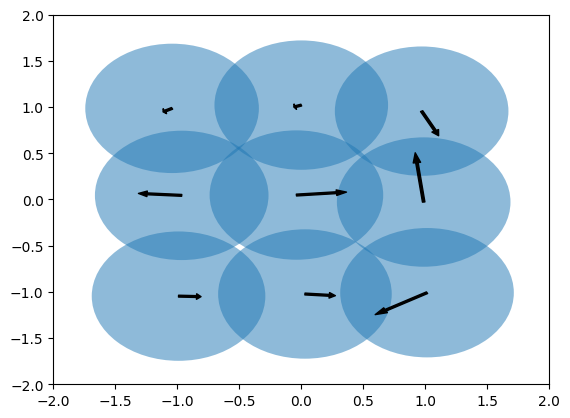

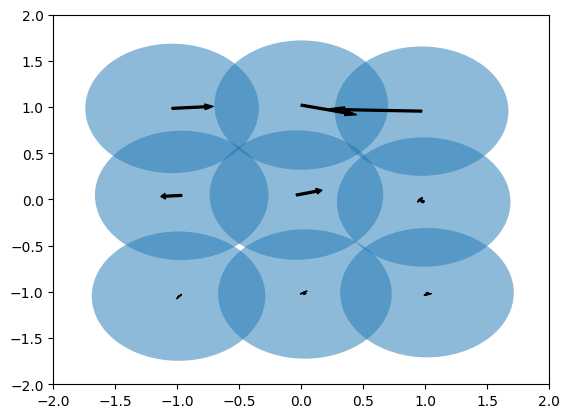

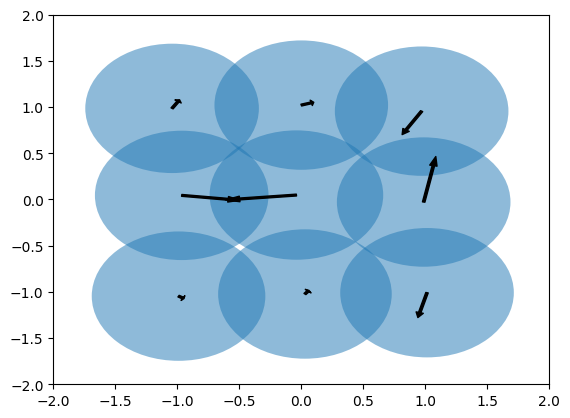

In [13]:
for vec in eig_vecs:
    vec = vec.reshape(len(vec)//2, 2)
    fig, ax = plt.subplots()

    patch_list = []
    arrow_list = []
    for v, dv in zip(pos, vec):
        patch_list.append(matplotlib.patches.Circle(v, radius=0.7, alpha=0.5))
        arrow_list.append(matplotlib.patches.Arrow(v[0], v[1], dv[0], dv[1], width=0.1, color='k'))
    p = PatchCollection(patch_list, match_original=True)
    ax.add_collection(p)
    p = PatchCollection(arrow_list, match_original=True)
    ax.add_collection(p)
    plt.ylim(-2, 2)
    plt.xlim(-2, 2)